### Import Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler

## Loading Dataset

### Diabetes clustering

In [5]:
# Importing the load_diabetes function from sklearn.datasets module
from sklearn.datasets import load_diabetes

# Loading the diabetes dataset and returning as a DataFrame using as_frame=True
df, _ = load_diabetes(return_X_y=True, as_frame=True, scaled=False)

# Selecting columns 'age', 'bmi', 'bp' from the DataFrame
df = df[['age', 'sex', 'bmi', 'bp']]

# Displaying the DataFrame
df

,age,sex,bmi,bp
0,59.0,2.0,32.1,101.00
1,48.0,1.0,21.6,87.00
2,72.0,2.0,30.5,93.00
3,24.0,1.0,25.3,84.00
4,50.0,1.0,23.0,101.00
...,...,...,...,...
437,60.0,2.0,28.2,112.00
438,47.0,2.0,24.9,75.00
439,60.0,2.0,24.9,99.67
440,36.0,1.0,30.0,95.00


In [6]:
# Dropping the 'sex' column from the filtered DataFrame
df = df.drop(columns=['sex'])

# Displaying the resulting DataFrame
df


,age,bmi,bp
0,59.0,32.1,101.00
1,48.0,21.6,87.00
2,72.0,30.5,93.00
3,24.0,25.3,84.00
4,50.0,23.0,101.00
...,...,...,...
437,60.0,28.2,112.00
438,47.0,24.9,75.00
439,60.0,24.9,99.67
440,36.0,30.0,95.00


In [7]:
# Creating a copy of the DataFrame to scale the features
df_scaled = df.copy()

# Instantiating a StandardScaler object
scaler = StandardScaler()

# Fitting the scaler to the data
scaler.fit(df_scaled)

# Transforming and scaling the DataFrame using the fitted scaler, and converting it back to a DataFrame
df_scaled = pd.DataFrame(scaler.transform(df_scaled), columns=df_scaled.columns)

# Displaying the scaled DataFrame
df_scaled

,age,bmi,bp
0,0.800500,1.297088,0.459841
1,-0.039567,-1.082180,-0.553505
2,1.793307,0.934533,-0.119214
3,-1.872441,-0.243771,-0.770650
4,0.113172,-0.764944,0.459841
...,...,...,...
437,0.876870,0.413360,1.256040
438,-0.115937,-0.334410,-1.422086
439,0.876870,-0.334410,0.363573
440,-0.956004,0.821235,0.025550


### NFL Clustering

In [9]:
# Importing the load_nfl function from yellowbrick.datasets module
from yellowbrick.datasets import load_nfl

# Loading the NFL dataset
X, y = load_nfl()

# Specify the features to use for clustering: ['Rec', 'Yds', 'TD', 'Fmb', 'Ctch_Rate']
features = ['Rec', 'Yds', 'TD', 'Fmb', 'Ctch_Rate']

# Selecting features and filtering only players with over 20 targets
X = X.query('Tgt >= 20')[features]

# Displaying the subset of the NFL dataset with selected features
X


,Rec,Yds,TD,Fmb,Ctch_Rate
0,125,1405,9,2,0.850
1,116,1163,8,1,0.744
2,115,1572,11,2,0.706
3,113,1677,8,2,0.665
4,113,1373,9,1,0.739
...,...,...,...,...,...
266,12,164,3,0,0.480
275,11,80,1,0,0.458
277,11,136,1,0,0.478
284,10,100,1,0,0.417


In [10]:
# Creating a copy of the feature DataFrame i.e. X to scale the features
df_nfl_scaled = X.copy()

# Instantiating a StandardScaler object
scaler_nfl = StandardScaler()

# Fitting the scaler to the data
scaler_nfl.fit(df_nfl_scaled)

# Transforming and scaling the DataFrame using the fitted scaler, and converting it back to a DataFrame
df_nfl_scaled = pd.DataFrame(scaler_nfl.transform(df_nfl_scaled), columns=df_nfl_scaled.columns)


## K-means clustering

### Diabetes clustering

**How many clusters should we use?**

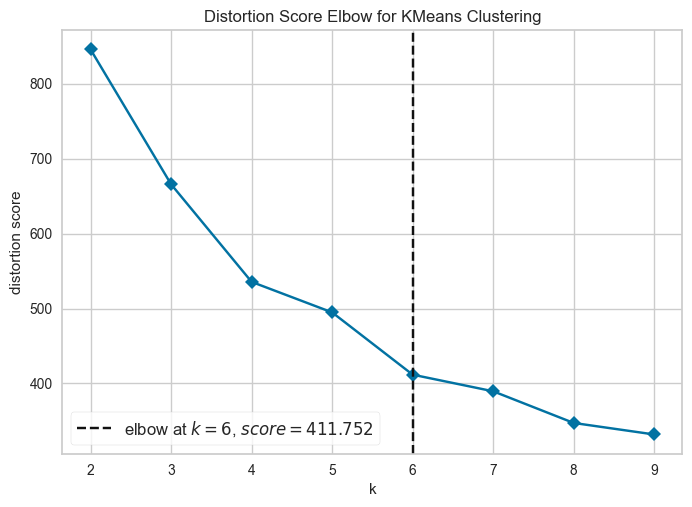

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=9, random_state=54), k=(2, 10),
                 timings=False)

In [11]:
# Importing the kelbow_visualizer from yellowbrick.cluster.elbow module
from yellowbrick.cluster.elbow import kelbow_visualizer

# Using the elbow method to determine the optimal number of clusters
# Creating a KelbowVisualizer with KMeans clustering algorithm, specifying a range of k values from 2 to 10
# Using the 'distortion' metric to evaluate cluster quality
# Disabling timings for faster execution
kelbow_visualizer(KMeans(random_state=54, n_init='auto'), df_scaled, k=(2, 10),
                  metric='distortion',
                  timings=False)


**How to perform Clustering?**

In [12]:
# Instantiating KMeans clustering with 3 clusters and a fixed random state
kmeans = KMeans(n_clusters=4, random_state=54, n_init=10)

# Fitting KMeans to the scaled DataFrame
kmeans.fit(df_scaled)

# Assigning cluster labels to the original DataFrame subset 'df_gender_1'
df['clusters'] = kmeans.labels_

# Converting cluster labels to categorical data type for better visualization with seaborn
df['clusters'] = df['clusters'].astype('category')  # Makes seaborn use qualitative color palette

# Display types
df.dtypes

age          float64
bmi          float64
bp           float64
clusters    category
dtype: object

In [13]:
# Transforming cluster centers from scaled space back to the original feature space using the scaler's inverse_transform method
centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=df_scaled.columns)

# Creating a DataFrame to hold cluster centers in the scaled space directly
centers_scaled = pd.DataFrame(kmeans.cluster_centers_, columns=df_scaled.columns)

# Displaying the cluster centers in the original feature space
print("Cluster centers in the original feature space:")
print(centers)

# Displaying the cluster centers in the scaled feature space
print("\nCluster centers in the scaled feature space:")
print(centers_scaled)


Cluster centers in the original feature space:
         age        bmi          bp
0  55.573427  24.342657   89.617622
1  32.683673  22.274490   83.676837
2  56.308824  29.116912  110.970662
3  40.569231  31.296923   88.097231

Cluster centers in the scaled feature space:
        age       bmi        bp
0  0.538814 -0.460702 -0.364036
1 -1.209271 -0.929343 -0.794041
2  0.594976  0.621130  1.181535
3 -0.607053  1.115114 -0.474085


**How to view clusters?**

In [14]:
def create_label_color_map(df):
    """
    Create a dictionary mapping cluster labels to colors based on the unique cluster labels in the DataFrame.

    Parameters:
    df (DataFrame): DataFrame containing a 'clusters' column with cluster labels.

    Returns:
    dict: A dictionary mapping cluster labels to colors.
    """
    # Extracting unique cluster labels
    unique_labels = df['clusters'].unique()

    # Define a dictionary to map cluster labels to colors
    label_color_map = {}

    # Define a list of colors
    colors = ['red', 'green', 'blue', 'orange', 'purple', 'yellow', 'cyan', 'magenta']

    # Assign colors to cluster labels
    for i, label in enumerate(unique_labels):
        label_color_map[label] = colors[i % len(colors)]

    return label_color_map

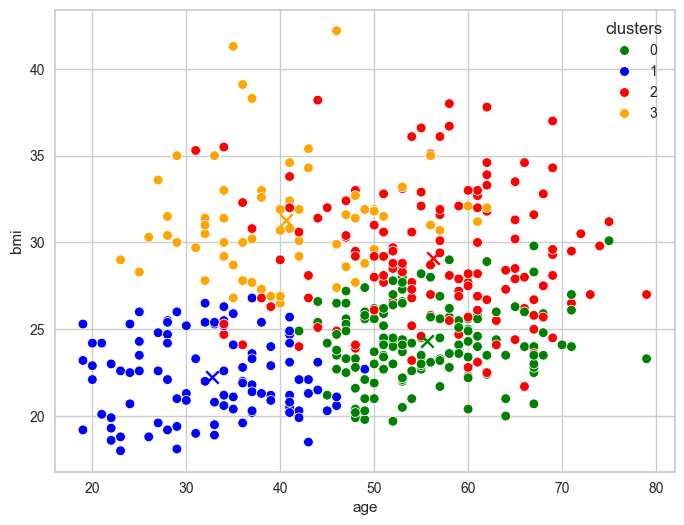

In [15]:
# Extracting unique cluster labels
label_color = create_label_color_map(df)

# Creating a new figure and axis object for plotting
fig, ax = plt.subplots(figsize=(8, 6))

# Generating a scatter plot of 'age' versus 'bmi' with cluster labels encoded by hue
sns.scatterplot(x='age', y='bmi', hue='clusters', data=df, ax=ax, palette=label_color)

# Plot cluster centers as 'x' markers
for label, color in label_color.items():
    center = centers[centers.index == label]
    ax.scatter(center['age'], center['bmi'], marker='x', s=80, color=color)

plt.show()

## Results

### Diabetes clustering

Counter({0: 143, 2: 136, 1: 98, 3: 65})


Text(0.5, 1.0, 'Cluster size distribution')

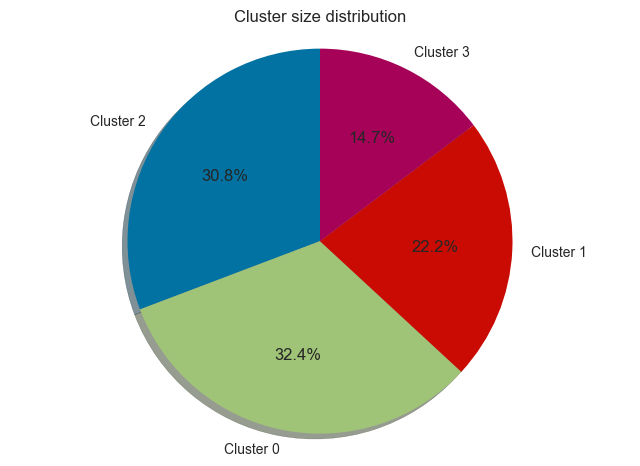

In [16]:
# Importing Counter from collections module to count occurrences of each cluster label
from collections import Counter

# Counting occurrences of each cluster label using Counter
counts = Counter(kmeans.labels_)

# Printing the counts of occurrences for each cluster
print(counts)

# Creating a new figure and axis object for plotting
fig1, ax1 = plt.subplots()

# Generating a pie chart to visualize the distribution of cluster sizes
ax1.pie(counts.values(), labels=[f'Cluster {i}' for i in counts.keys()], autopct='%1.1f%%',
        shadow=True, startangle=90)

# Ensuring equal aspect ratio to draw the pie chart as a circle
ax1.axis('equal')

# Adding a title to the pie chart
ax1.set_title('Cluster size distribution')


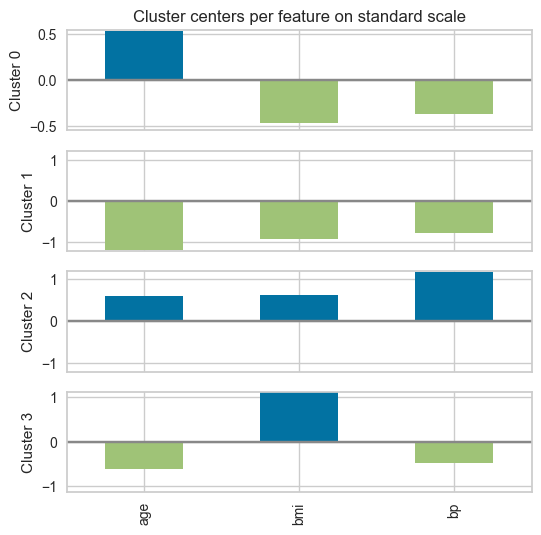

In [17]:
# Creating subplots with a row for each cluster and one column, sharing the x-axis
f, axes = plt.subplots(kmeans.n_clusters, 1, figsize=(6, 6), sharex=True)

# Iterating over each subplot and corresponding cluster center
for i, ax in enumerate(axes):
    # Extracting the center values for the current cluster
    center = centers_scaled.loc[i, :]

    # Calculating the maximum value to set y-axis limits
    maxPC = 1.01 * np.max(np.max(np.abs(center)))

    # Assigning colors for positive and negative values in the center
    colors = ['C0' if l > 0 else 'C1' for l in center]

    # Adding a horizontal line for better visualization
    ax.axhline(color='#888888')

    # Plotting the bar chart of cluster center values with specified colors
    center.plot.bar(ax=ax, color=colors)

    # Setting y-axis label for each subplot
    ax.set_ylabel(f'Cluster {i}')

    # Setting y-axis limits for better visualization
    ax.set_ylim(-maxPC, maxPC)

    # Adding a title to the first subplot
    if i == 0:
        ax.set_title('Cluster centers per feature on standard scale')


**Note:** Typically, it is adviced to back transform the centers to original scale. It seems to me that leaving them on the standard scales helps interpretation.

For example, in the plot above, _Cluster 0_ contains patients with age well above average -> older individuals who have high bmi and high bp; _Cluster 1_ on the other hand has patients with age well below the average -> young individuals who have low bmi and low bp. Finally, _Cluster 2_ has average age patients with high bmi and low bp.

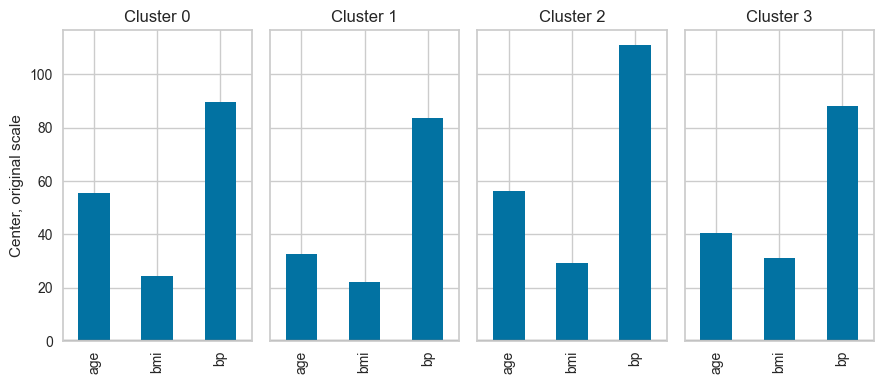

In [18]:
# Creating subplots with one row and a column for each cluster, sharing the y-axis
f, axes = plt.subplots(1, kmeans.n_clusters, figsize=(9, 4), sharey=True)

# Finding the maximum value among all cluster centers
overall_max = centers.max().max()

# Iterating over each subplot and corresponding cluster center
for i, ax in enumerate(axes):
    # Extracting the center values for the current cluster
    center = centers.loc[i, :]

    # Assigning colors for positive and negative values in the center
    colors = ['C0' if l > 0 else 'C1' for l in center]

    # Adding a horizontal line for better visualization
    ax.axhline(color='#888888')

    # Plotting the bar chart of cluster center values with specified colors
    center.plot.bar(ax=ax, color=colors)

    # Setting title for each subplot
    ax.set_title(f'Cluster {i}')

    # Setting y-axis label for the first subplot
    if i == 0:
        ax.set_ylabel('Center, original scale')

# Adjusting the layout of subplots for better appearance
plt.tight_layout()


## DBSCAN
The DBSCAN algorithm is a density-based clustering algorithm that groups together points that are closely packed together. It does not require specifying the number of clusters beforehand, unlike KMeans. Instead, it identifies clusters based on dense regions separated by sparser areas (noise).

In [20]:
from sklearn.cluster import DBSCAN
# Instantiating KMeans clustering with 3 clusters and a fixed random state
dbscan = DBSCAN(n_jobs=-1, min_samples=5)
# Fitting KMeans to the scaled DataFrame
dbscan.fit(df_scaled)
# Assigning cluster labels to the original DataFrame subset 'df_gender_1'
df['clusters'] = dbscan.labels_
# Converting cluster labels to categorical data type for better visualization with seaborn
df['clusters'] = df['clusters'].astype('category') # Makes seaborn use qualitative color palette
# Display DF
df

,age,bmi,bp,clusters
0,59.0,32.1,101.00,0
1,48.0,21.6,87.00,1
2,72.0,30.5,93.00,-1
3,24.0,25.3,84.00,1
4,50.0,23.0,101.00,1
...,...,...,...,...
437,60.0,28.2,112.00,1
438,47.0,24.9,75.00,1
439,60.0,24.9,99.67,1
440,36.0,30.0,95.00,-1


## Optional: More ways to check Number of Clusters

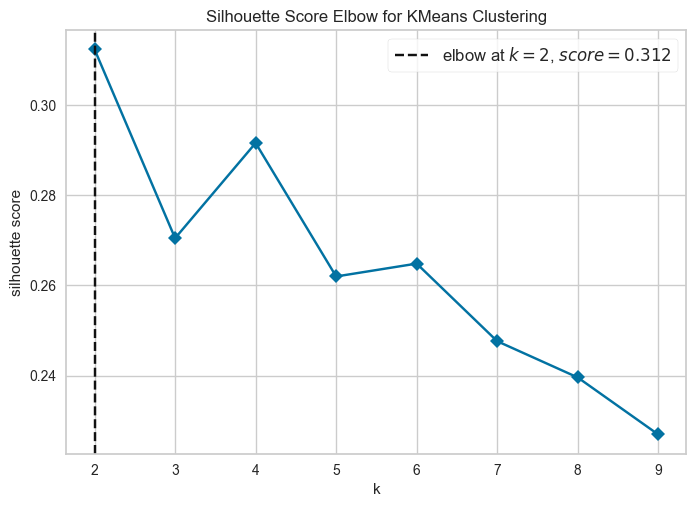

KElbowVisualizer(ax=<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>,
                 estimator=KMeans(n_clusters=9, random_state=54), k=(2, 10),
                 metric='silhouette', timings=False)

In [21]:
kelbow_visualizer(KMeans(random_state=54), df_scaled, k=(2,10),
                  metric='silhouette',
                 timings=False)

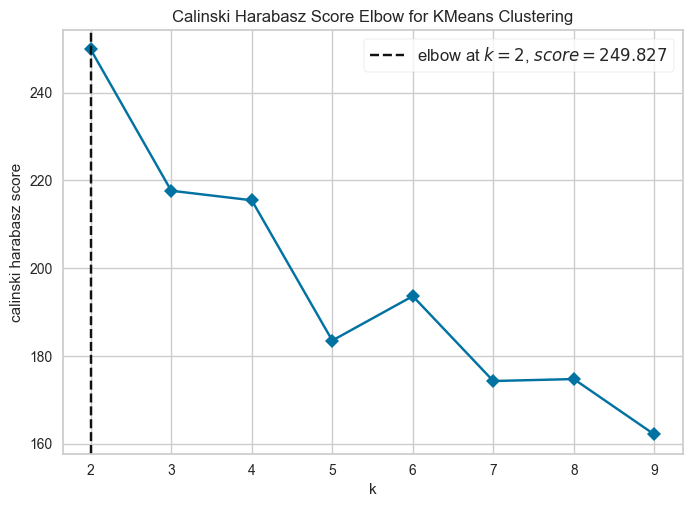

KElbowVisualizer(ax=<Axes: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>,
                 estimator=KMeans(n_clusters=9, random_state=54), k=(2, 10),
                 metric='calinski_harabasz', timings=False)

In [22]:
kelbow_visualizer(KMeans(random_state=54), df_scaled, k=(2,10),
                  metric='calinski_harabasz',
                 timings=False)